<h1> Muhammad Abimanyu Iwari Rama Putra
<h1> 09011381823104    

<h1>Klasifikasi data menggunakan metode Desicion Tree
    

<h3> libary yang digunakan adalah :
 <h4> numpy (as np)
 <h4>pandas
 <h4>DesicionTreeClassifier dari sklearn.tree

In [17]:
#numpy berfungsi untuk mengolah data numerik
#pandas berfungsi untuk memanipulasi data
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


In [18]:
st = pd.read_csv("stars.csv", delimiter= ',')
st.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,yellow,M
2,2600,0.000300,0.1020,18.70,0,blue,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,blue white,M


In [19]:
#untuk melihat banyaknya baris dan kolom
st.shape



(240, 7)

<h3> menggunakan st sebagai data stars.csv yang dibaca oleh pandas
<h3> yang dinyatakan oleh 2 variables  yaitu :
    <h3> X sebagai fitur data(st) dan y sebagai target

In [20]:
st = st.drop(['Star type', 'Spectral Class'], axis=1)
st.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color
0,3068,0.002400,0.1700,16.12,Red
1,3042,0.000500,0.1542,16.60,yellow
2,2600,0.000300,0.1020,18.70,blue
3,2800,0.000200,0.1600,16.65,Red
4,1939,0.000138,0.1030,20.06,blue white


<h3> barulah sekarang kita bisa mengisi variabel target

In [21]:
y = st["Star color"]
y[0:5]


0           Red
1        yellow
2          blue
3           Red
4    blue white
Name: Star color, dtype: object

<h3> split data set ( training data & testing data)

In [22]:
from sklearn.model_selection import train_test_split


#### train_test_split akan dibagi menjadi 4 parameter yaitu:
 X_trainset,X_testset,y_trainset,y_testset

pada data ini menggunakan 80% untuk training dan 20% untuk testing data

In [23]:
X = st[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']]
y = st["Star color"]
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
#hasil dari train set 
print("Train Set:", X_trainset.shape, y_trainset.shape)

Train Set: (192, 4) (192,)


In [25]:
#hasil dari test set

print("Test Set:", X_testset.shape, y_testset.shape)

Test Set: (48, 4) (48,)


### Modelling

pada tahap modeling pertama tama yaitu membuat  instance desiciontreeclassifier
yang disebut dengan drugtree,didalam classifier  tentukan "entropy" sehingga dapat melihat peroleh informasi  dari setiap node


yang dimana entropi tersebut memiliki fungsi untuk mengukur seberapa informatifnya  sebuah node

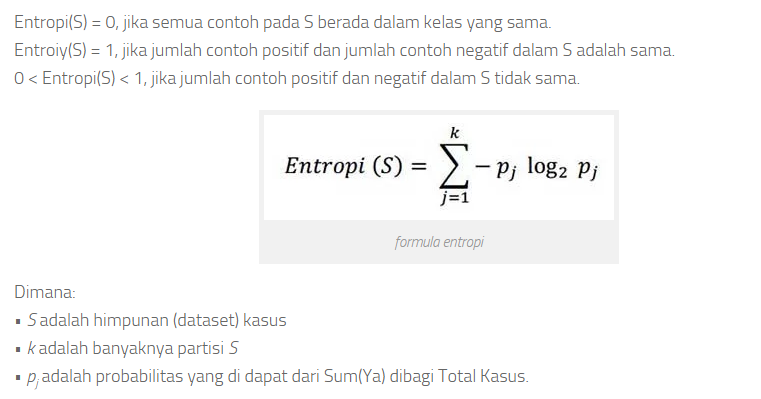

In [26]:
starTree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
starTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
starTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

selanjutnya membuat beberapa prediksi pada dataset pengujian dan menyimpannya ke dalam variabel yang disebut predTree.

In [28]:
predTree = starTree.predict(X_testset)

melihat perbandingan y_test dengan nilai yang sebenarnya

In [29]:
print (predTree [0:5])
print (y_testset [0:5])

['Blue' 'Red' 'Blue' 'Red' 'Blue']
109            Blue
71              Red
37     yellow-white
74              Red
108            Blue
Name: Star color, dtype: object


### akurasi score untuk test data

In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.6458333333333334


dapat dilihat bahwa nilai akurasinya sebesar 65%

<h3> VISUALISASI

In [31]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline


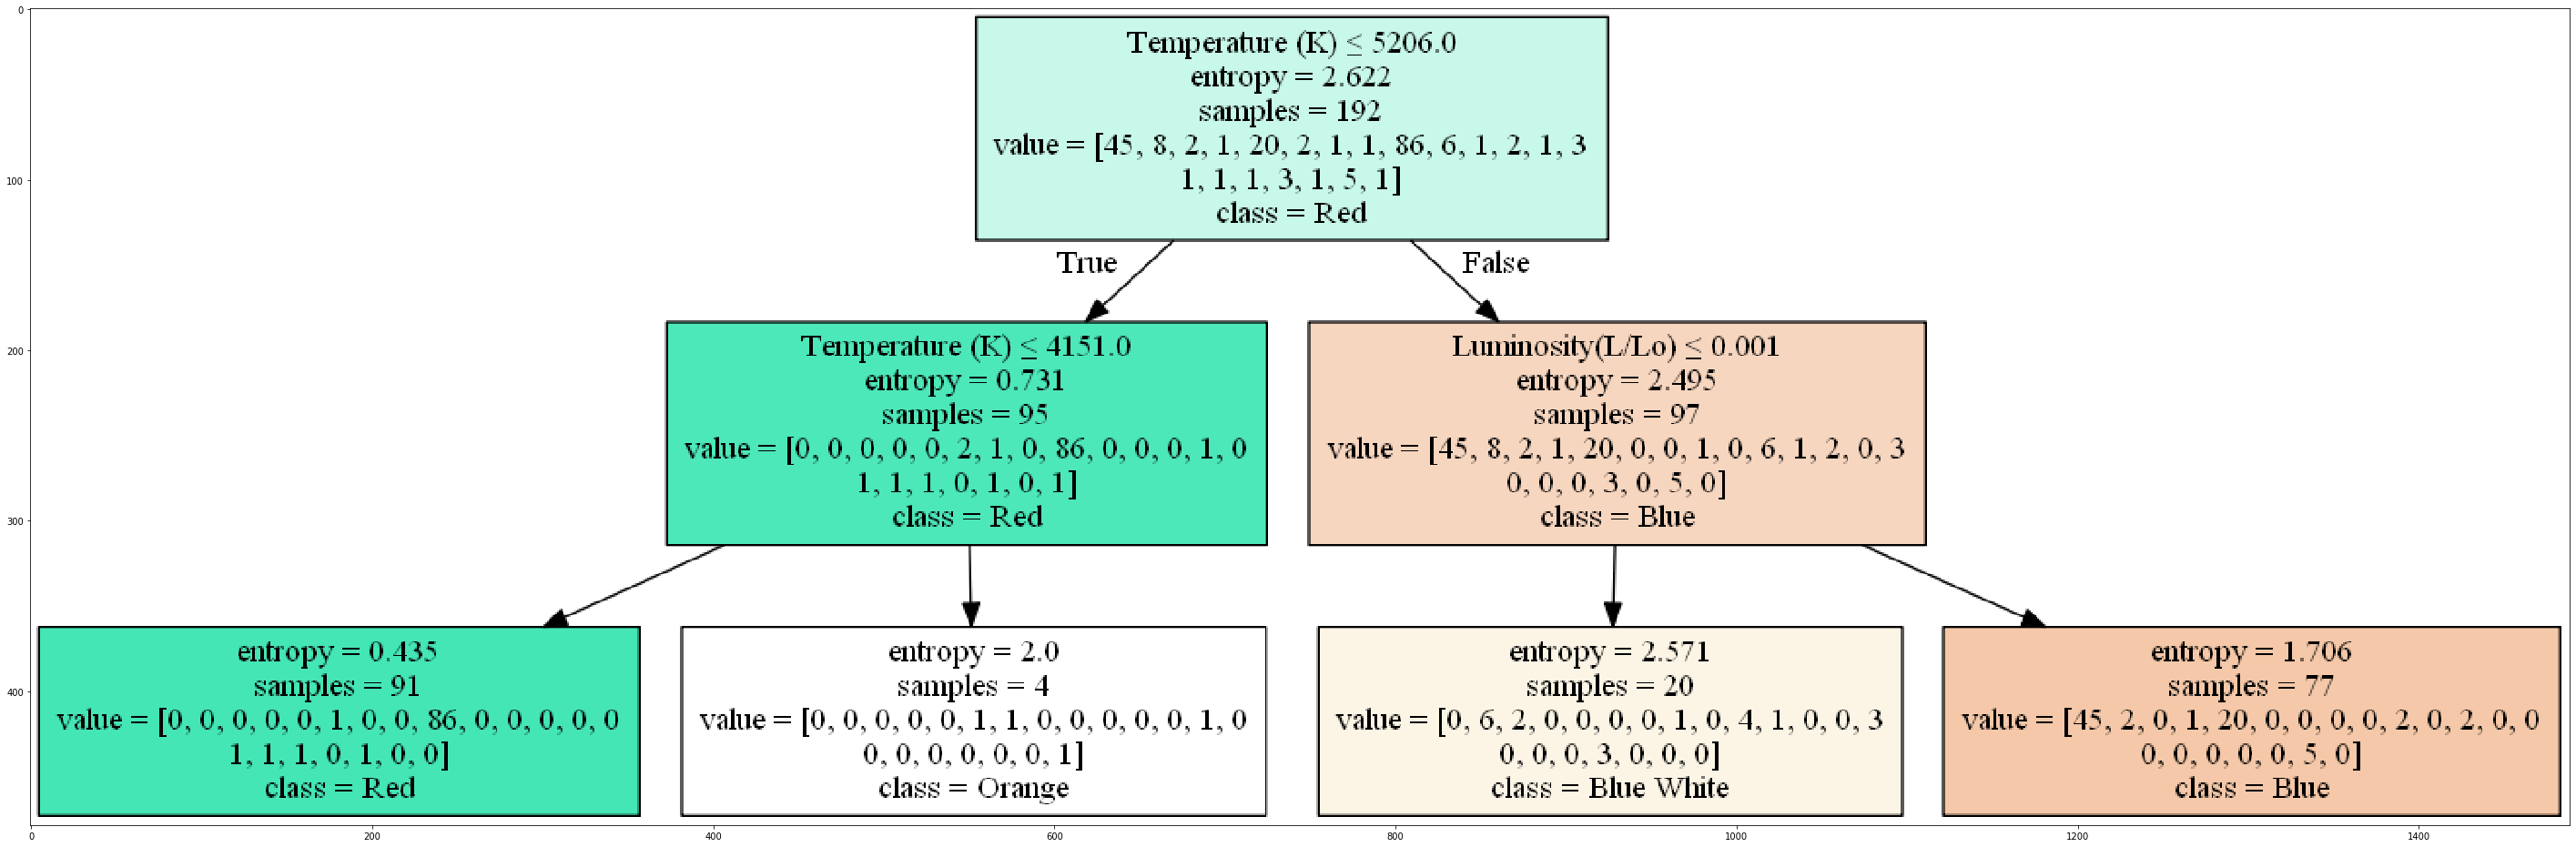

In [32]:
dot_data = StringIO()
filename = "starTree.png"
featureNames = st.columns[0:4]
targetNames = st["Star color"].unique().tolist()
out=tree.export_graphviz(starTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(50, 80))
plt.imshow(img,interpolation='nearest')

pada prediksi data bintang menggunakan metode desiciontree menghasilkan performa akurasi sebesar 65%